In [1]:
import json
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [2]:
# experiment index 7
preprocess = "7b7e2a8bf760ee2ed84b4797c7161d73"
vectorize = "dae182a800a858f348333ea1587d70cd"
predict = "2ac72005599c3cd46bc320dbdb74cd06"

data_path = "../data/cache/experiments/"

In [3]:
# grab the aspect data
with open(data_path + "vec_" + vectorize + "/aspects/aspects.json", 'r') as in_file:
    aspect_data = json.load(in_file)

In [4]:
# grab the as_vecs
with open(data_path + "vec_" + vectorize + "/as_vec/doc_as_vectors.json", 'r') as in_file:
    as_vec = json.load(in_file)

In [5]:
# and finally grab the articles themselves
articles = pd.read_json(data_path + "preproc_" + preprocess + "/documents.json")

So first we need to group all the as_vec for each particular source

In [6]:
articles.source.value_counts()

Breitbart              608
Washington Post        597
NPR                    546
Guardian               536
Atlantic               535
Vox                    460
New York Times         445
Reuters                423
National Review        330
New York Post          201
Business Insider       124
Talking Points Memo    108
Fox News                87
Name: source, dtype: int64

In [7]:
source_groups = articles.groupby(['source'])
source_as_vec = {}

for group in source_groups:
    # group[0] is the name
    # group[1] is the dataframe with all articles from that source
    
    # create key for this source in the source_as_vec dictionary
    source_name = group[0]
    source_as_vec[source_name] = []
    
    for index in group[1].index:
        #print(index)
        source_as_vec[source_name].append(as_vec[index])

Alternatively, make as_vec a dataframe and add the source column to that

In [8]:
as_df = pd.DataFrame(as_vec)

In [9]:
as_df_source = pd.concat([as_df, articles.source], axis=1)

In [10]:
as_df_source.groupby(['source']).std()

,0,1,2,3,4,5,6,7,8,9,...,12524,12525,12526,12527,12528,12529,12530,12531,12532,12533
source,,,,,,,,,,,,,,,,,,,,,
Atlantic,2.219245e-02,0.445232,0.004481,2.472380e-02,0.083435,0.007963,1.509033,0.332915,0.194084,0.338316,...,4.379776e-03,5.208277e-02,0.001174,1.961095e-04,0.018086,1.470551e-02,2.112454e-03,0.000000e+00,4.773438e-05,0.000000e+00
Breitbart,1.550695e-03,0.291186,0.019075,6.316449e-02,0.027680,0.020664,0.711487,0.124530,0.317988,0.186941,...,0.000000e+00,4.912316e-02,0.014557,2.821298e-02,0.025908,4.405794e-03,4.379246e-03,0.000000e+00,4.312168e-10,2.084499e-20
Business Insider,4.352761e-05,0.032594,0.030882,2.670227e-07,0.007272,0.007273,0.352691,0.115754,0.226976,0.034783,...,3.346422e-19,3.461816e-19,0.000000,9.231509e-20,0.000000,0.000000e+00,3.714100e-23,0.000000e+00,0.000000e+00,0.000000e+00
Fox News,0.000000e+00,0.071340,0.005796,8.141872e-03,0.023236,0.000713,0.474035,0.117006,0.678467,0.047893,...,0.000000e+00,0.000000e+00,0.000014,0.000000e+00,0.000000,1.009681e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Guardian,8.430643e-05,0.502915,0.019179,3.280220e-02,0.015520,0.020823,0.617517,0.469288,0.163069,0.123554,...,1.028918e-03,3.961328e-02,0.000000,0.000000e+00,0.014944,5.574965e-02,3.451717e-07,0.000000e+00,0.000000e+00,0.000000e+00
NPR,2.382044e-04,0.329495,0.032874,1.490139e-02,0.035879,0.004280,0.895643,0.266438,0.167733,0.075179,...,8.648690e-16,1.908772e-07,0.004910,5.011766e-06,0.010606,5.568118e-02,1.113450e-07,0.000000e+00,1.700195e-28,0.000000e+00
National Review,3.049565e-04,0.511450,0.072454,2.760434e-02,0.000932,0.017331,0.583358,0.168196,0.266048,0.241157,...,1.473422e-05,0.000000e+00,0.023310,0.000000e+00,0.035104,1.473422e-05,2.836034e-02,0.000000e+00,1.459402e-03,0.000000e+00
New York Post,7.154268e-03,0.046156,0.000880,5.236315e-02,0.000002,0.002856,0.164979,0.129198,0.633261,0.054843,...,0.000000e+00,0.000000e+00,0.000000,1.071399e-09,0.000059,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
New York Times,1.013605e-03,0.450444,0.000286,2.487768e-02,0.001391,0.070849,0.448213,0.208857,0.245504,0.139811,...,5.749104e-03,8.317610e-02,0.000000,7.127529e-02,0.030142,2.559832e-03,7.615754e-04,0.000000e+00,0.000000e+00,0.000000e+00


In [11]:
list(aspect_data.keys())[156]

'ground'

In [12]:
# for some poor semblance of ordering
aspects = list(aspect_data.keys())
aspects_reverse = {}
index = 0
for aspect in aspects:
    aspects_reverse[aspect] = index
    index += 1

In [13]:
from collections import OrderedDict

aspect_data_ordered = OrderedDict(sorted(aspect_data.items(), key=lambda x:x[1]["flr"], reverse=True))

aspect_ordered_translation_indices = []
for aspect in list(aspect_data_ordered.keys()):
    index = aspects_reverse[aspect]
    aspect_ordered_translation_indices.append(index)

print(aspect_ordered_translation_indices[0:5])

[26, 6, 88, 387, 8]


In [48]:
# get the column index of the aspect that's 0th (highest flr) in the ordered aspect list
nth = 4
nth_neg = nth+len(aspect_data.keys())
nth_neutral = nth+len(aspect_data.keys())*2
index = aspects_reverse[list(aspect_data_ordered.keys())[nth]]
print(index)
print(aspects[index])

8
climate


In [49]:
as_df_source.groupby(['source']).std()[[nth, nth_neg, nth_neutral]]

,4,4182,8360
source,,,
Atlantic,0.083435,0.053671,0.382985
Breitbart,0.027680,0.046133,0.327395
Business Insider,0.007272,0.002424,0.029090
Fox News,0.023236,0.019950,0.314121
Guardian,0.015520,0.041852,0.134930
NPR,0.035879,0.067390,0.224236
National Review,0.000932,0.009451,0.159994
New York Post,0.000002,0.004267,0.098139
New York Times,0.001391,0.010635,0.189436


In [50]:
as_df_source.groupby(['source']).mean()[[nth, nth_neg, nth_neutral]]

,4,4182,8360
source,,,
Atlantic,1.108176e-02,0.006370,0.053409
Breitbart,2.147994e-03,0.003614,0.025854
Business Insider,6.622904e-04,0.000223,0.002637
Fox News,2.776074e-03,0.003643,0.045756
Guardian,1.106654e-03,0.002804,0.011721
NPR,2.810723e-03,0.005366,0.019779
National Review,6.043433e-05,0.000790,0.011230
New York Post,2.034386e-07,0.000301,0.007012
New York Times,9.582416e-05,0.001024,0.014806


Need to try to graph these for decreasing FLR scores and see how well they correlate

In [16]:
positive_df = as_df_source.groupby(['source']).std().iloc[:, 0:4178]

In [17]:
len(aspect_ordered_translation_indices)

4178

In [18]:
cols = positive_df.columns.tolist()
reorderedcols = []
for index in aspect_ordered_translation_indices:
    reorderedcols.append(cols[index])
print(len(cols))

4178


In [19]:
positive_df_ordered = positive_df.iloc[:, reorderedcols]
positive_df_ordered

,26,6,88,387,8,239,7,411,166,12,...,3876,3052,3830,3443,2453,4175,3293,3814,3452,4105
source,,,,,,,,,,,,,,,,,,,,,
Atlantic,1.227363,1.509033,0.119409,0.253626,0.194084,0.301310,0.332915,0.524731,0.260895,0.034374,...,8.678978e-06,1.763275e-05,3.624281e-06,1.167115e-03,2.410813e-02,0.000000e+00,9.580276e-05,0.000000e+00,9.617889e-05,0.000000e+00
Breitbart,0.296690,0.711487,0.119353,0.302439,0.317988,0.143259,0.124530,0.562545,0.104026,0.065891,...,2.156084e-10,0.000000e+00,1.692758e-07,0.000000e+00,8.211086e-04,0.000000e+00,0.000000e+00,0.000000e+00,1.797352e-04,1.181530e-28
Business Insider,0.186838,0.352691,0.095750,0.034481,0.226976,0.002055,0.115754,1.831626,0.184094,0.135843,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.004577e-06,0.000000e+00,1.025403e-13,0.000000e+00,0.000000e+00,0.000000e+00
Fox News,0.287861,0.474035,0.294007,0.136362,0.678467,0.000297,0.117006,0.259365,0.161433,0.039266,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.628508e-10,0.000000e+00,0.000000e+00,0.000000e+00
Guardian,0.167705,0.617517,0.084475,0.186371,0.163069,0.092875,0.469288,0.448714,0.253286,0.060095,...,1.134360e-12,4.118674e-03,0.000000e+00,0.000000e+00,3.498082e-03,0.000000e+00,1.734175e-05,0.000000e+00,7.178501e-05,0.000000e+00
NPR,0.205546,0.895643,0.138148,0.218646,0.167733,0.221186,0.266438,0.846120,0.324985,0.046417,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.695274e-03,0.000000e+00,1.590643e-08,0.000000e+00,0.000000e+00,0.000000e+00
National Review,0.282770,0.583358,0.119043,0.095710,0.266048,0.436002,0.168196,0.196033,0.084672,0.038393,...,0.000000e+00,3.715131e-03,1.486052e-03,0.000000e+00,1.165501e-02,0.000000e+00,0.000000e+00,0.000000e+00,5.824139e-24,0.000000e+00
New York Post,0.141628,0.164979,0.078913,0.035929,0.633261,0.078547,0.129198,0.473750,0.108797,0.020792,...,0.000000e+00,0.000000e+00,6.681745e-16,0.000000e+00,6.554069e-08,0.000000e+00,0.000000e+00,0.000000e+00,5.243255e-08,0.000000e+00
New York Times,0.213062,0.448213,0.965953,0.094652,0.245504,0.011139,0.208857,0.235898,0.155473,0.052155,...,0.000000e+00,3.755655e-03,8.043236e-11,4.404829e-08,3.199800e-04,0.000000e+00,0.000000e+00,1.197503e-16,0.000000e+00,0.000000e+00


In [21]:
import matplotlib.pyplot as plt

In [22]:
positive_df_ordered[positive_df_ordered.index == "Atlantic"][26]

source
Atlantic    1.227363
Name: 26, dtype: float64

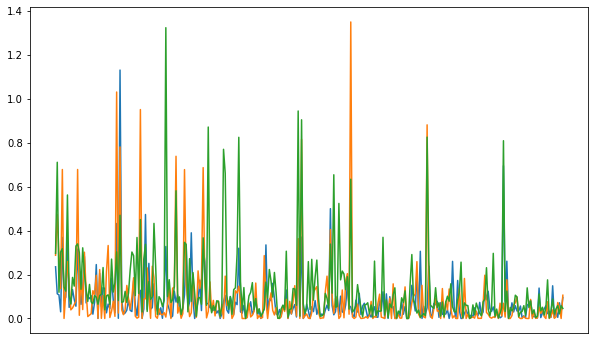

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
source = "Fox News"

cols = positive_df_ordered.columns.tolist()

col_range = 300

source_flr_series = {}
for source in as_df_source.groupby(['source']).groups:
    source_flr_series[source] = []
    row = positive_df_ordered[positive_df_ordered.index == source]
    
    for i in cols[0:col_range]:
        source_flr_series[source].append(row[i])
    




x = []
for i in cols[0:col_range]:
    x.append(str(i))
    

#for source in source_flr_series.keys():
    #ax.plot(x, y)
    
ax.plot(x, source_flr_series["Reuters"], color='C0')
ax.plot(x, source_flr_series["Fox News"], color='C1')
ax.plot(x, source_flr_series["Breitbart"], color='C2')

#ax.plot(x, y)
ax.set_xticks([])
#ax.set_yscale("log")
plt.show()